# Double 7's Portfolio (Short Term Trading Strategies that Work)

    1. The SPY is above its 200-day moving average or X-day ma
    2. The SPY closes at a 7-day low, buy.
    3. If the SPY closes at a 7-day high, sell your long position.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [17]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [18]:
#symbols = ['XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY']
#symbols = ['IWB', 'SPY', 'VGK', 'IEV', 'EWJ', 'EPP', 'IEF', 'SHY', 'GLD']
#symbols = ['FB', 'AMZN', 'NFLX', 'GOOG']
symbols = ['SPY', 'QQQ', 'TLT', 'GLD']
#symbols = ['SPY']

capital = 10000
start = datetime.datetime(1900, 1, 1)
#start = datetime.datetime.strptime(pf.SP500_BEGIN, '%Y-%m-%d')
end = datetime.datetime.now()
#end = datetime.datetime(2019, 1, 1)
# num months lookback
period = 7

use_cache = False
use_regime_filter = True
use_vola_weight = True

Run Strategy

In [19]:
s = strategy.Strategy(symbols, capital, start, end, stop_loss_pct=85, margin=3, period=period,
                      use_cache=use_cache, use_regime_filter=use_regime_filter,
                      use_vola_weight=use_vola_weight)
s.run()

STOP LOSS!!!
STOP LOSS!!!
STOP LOSS!!!


Retrieve log DataFrames

In [20]:
rlog, tlog, dbal = s.get_logs()
stats = s.get_stats()

In [21]:
rlog.head()

,date,seq_num,price,shares,entry_exit,direction,symbol
0,2005-09-07,0,57.37,158,entry,LONG,TLT
1,2005-09-14,1,90.64,84,entry,LONG,SPY
2,2005-09-14,2,34.54,219,entry,LONG,QQQ
3,2005-09-29,3,90.61,84,exit,LONG,SPY
4,2005-09-29,4,34.55,219,exit,LONG,QQQ


In [22]:
tlog.tail()

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,direction,symbol
576,2020-09-03,344.01,2020-09-28,334.19,-9.82,-2671.84,272,97426.76,LONG,SPY
577,2020-09-03,287.41,2020-09-28,277.20,-10.21,-2093.05,205,95333.71,LONG,QQQ
578,2020-09-18,163.40,2020-09-23,164.32,0.92,590.03,642,95923.74,LONG,TLT
579,2020-09-21,179.52,2020-10-01,178.70,-0.82,-257.48,314,95666.26,LONG,GLD
580,2020-09-30,163.09,2020-10-13,161.75,-1.34,-1100.95,821,94565.31,LONG,TLT


In [23]:
dbal.tail()

,high,low,close,shares,cash,leverage,state
date,,,,,,,
2020-10-12,103621.16,103621.16,103621.16,821,-28231.44,1.27,-
2020-10-13,104565.31,104565.31,104565.31,0,104565.31,1.00,X
2020-10-14,104565.31,104565.31,104565.31,0,104565.31,1.00,-
2020-10-15,104565.31,104565.31,104565.31,0,104565.31,1.00,-
2020-10-16,104565.31,104565.31,104565.31,0,104565.31,1.00,-


Generate strategy stats - display all available stats

In [24]:
pf.print_full(stats)

start                                                   2005-09-02
end                                                     2020-10-16
beginning_balance                                            10000
ending_balance                                           104565.31
total_net_profit                                          94565.31
gross_profit                                             194782.68
gross_loss                                              -100217.37
profit_factor                                                 1.94
return_on_initial_capital                                   945.65
annual_return_rate                                           16.79
trading_period                           15 years 1 months 14 days
pct_time_in_market                                           70.13
margin                                                           3
avg_leverage                                                  1.30
max_leverage                                                  

,cumul_total,weight,pct_cumul_total,relative_performance
SPY,"$24,207.60",0.25,0.26,1.02
QQQ,"$31,594.23",0.25,0.33,1.34
TLT,"$22,356.21",0.25,0.24,0.95
GLD,"$16,407.27",0.25,0.17,0.69
TOTAL,"$94,565.31",1.00,1.00,1.00


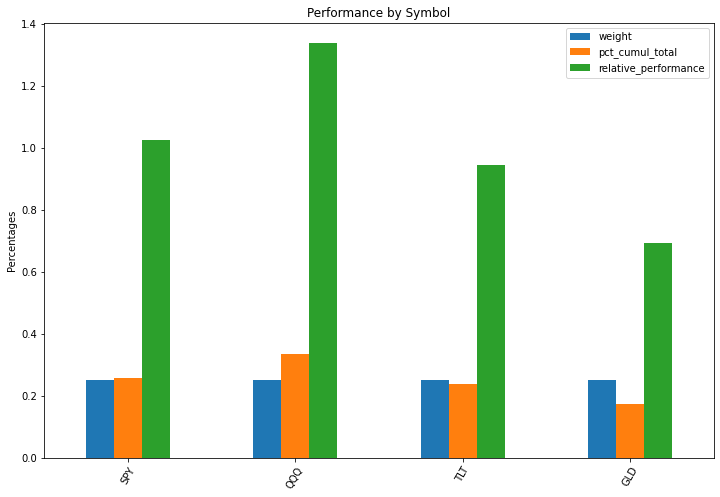

In [25]:
weights = {symbol: 1 / len(symbols) for symbol in symbols}
totals = s.portfolio.performance_per_symbol(weights=weights)
totals

,SPY,QQQ,TLT,GLD
SPY,1.00,0.92,-0.43,0.04
QQQ,0.92,1.00,-0.39,0.02
TLT,-0.43,-0.39,1.00,0.14
GLD,0.04,0.02,0.14,1.00


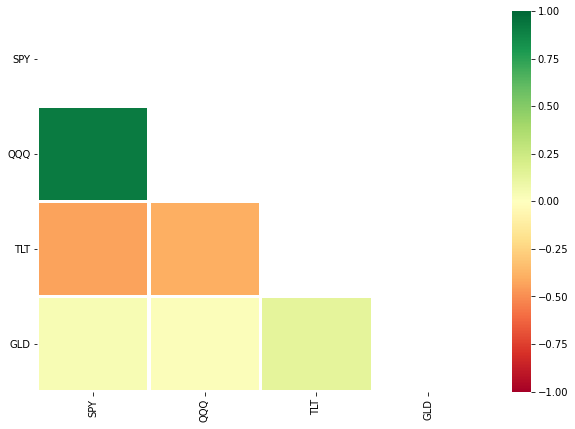

In [26]:
corr_df = s.portfolio.correlation_map(s.ts)
corr_df

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [27]:
benchmark = pf.Benchmark('SPY', capital, s.start, s.end, use_adj=True)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.get_stats()

2005-09-02 00:00:00 BUY  111 SPY @ 89.94
2020-10-16 00:00:00 SELL 111 SPY @ 347.29


Plot Equity Curves: Strategy vs Benchmark

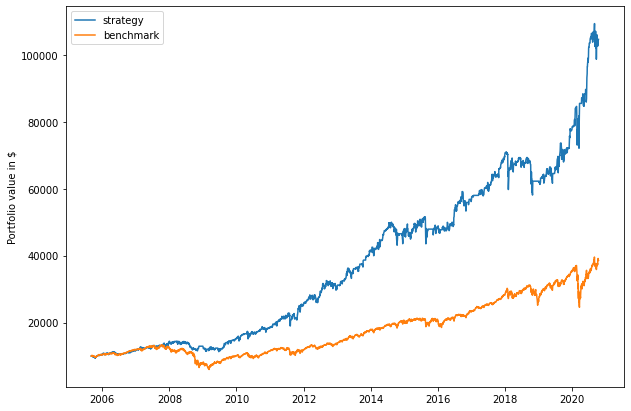

In [28]:
pf.plot_equity_curve(dbal, benchmark=benchmark.dbal)

Plot Trades

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,16.79,9.34
max_closed_out_drawdown,-21.72,-55.12
drawdown_annualized_return,-1.29,-5.90
drawdown_recovery,-1.24,-1.42
best_month,20.92,23.56
worst_month,-15.46,-30.97
sharpe_ratio,0.95,0.55
sortino_ratio,1.06,0.65
monthly_std,3.83,4.67
annual_std,15.14,15.88


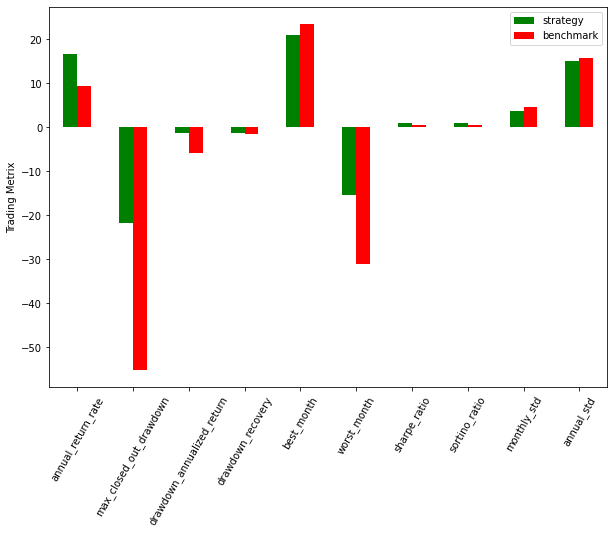

In [29]:
df = pf.plot_bar_graph(stats, benchmark.stats)
df

Analysis: Kelly Criterian

In [30]:
kelly = pf.kelly_criterian(stats, benchmark.stats)
kelly

sharpe_ratio            0.95
sharpe_ratio_max        1.01
sharpe_ratio_min        0.89
strategy risk           0.15
instrument risk         0.16
optimal target risk     0.95
half kelly criterian    0.47
aggressive leverage     5.97
moderate leverage       2.99
conservative leverage   2.80
dtype: float64